<a href="https://colab.research.google.com/github/mujtabenator/Hypothesis-Testing-with-Men-s-and-Women-s-Soccer-Matches/blob/main/hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# Step 1: Import dataset file Women

url1 = 'https://raw.githubusercontent.com/mujtabenator/Hypothesis-Testing-with-Men-s-and-Women-s-Soccer-Matches/main/men_results.csv'
url2 = 'https://raw.githubusercontent.com/mujtabenator/Hypothesis-Testing-with-Men-s-and-Women-s-Soccer-Matches/main/women_results.csv'

In [83]:
# load the data
men_df = pd.read_csv('men_results.csv')
women_df = pd.read_csv('women_results.csv')

In [84]:
# Import Libraries

import pandas as pd
import pingouin
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

In [85]:
# Filter the data for the time range and tournament
men_df["date"] = pd.to_datetime(men_df["date"])
men_subset = men_df[(men_df["date"] > "2002-01-01") & (men_df["tournament"].isin(["FIFA World Cup"]))]
women_df["date"] = pd.to_datetime(women_df["date"])
women_subset = women_df[(women_df["date"] > "2002-01-01") & (women_df["tournament"].isin(["FIFA World Cup"]))]

In [86]:
# Create a gendeer column
women_filtered['group'] = ['women']*women_filtered.shape[0]
men_filtered['group'] = ['men']*men_filtered.shape[0]

# Concatenate two datasets
df = pd.concat([women_filtered, men_filtered], axis=0, ignore_index=True)

# Drop 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', inplace=True)

# Create a column calculating the total goals per match
df['total_score'] = df['home_score'] + df['away_score']

In [87]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,goals_scored,group,total_score
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women,3
1,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women,2
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women,5
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women,6
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women,4


1. Choosing the test
Hypothesises with a 10% significance level:

 : The mean number of goals scored in women's international soccer matches is the same as men's.

 : The mean number of goals scored in women's international soccer matches is greater than men's.

1.1. Explanation for choosing unpaired two-sample test:

Unpaired and two-sample: Comparing the mean of two independent groups (men's and women's)
Type of data (goals) is numeric (discrete)
Test suggestions:

A parametric test: t-test
A non-parametric test: Mann-Whitney test
To determine which test is appropriate, checking sample size in each group & checking the normality of each distribution are required.

1.2. Checking the normality of total_score

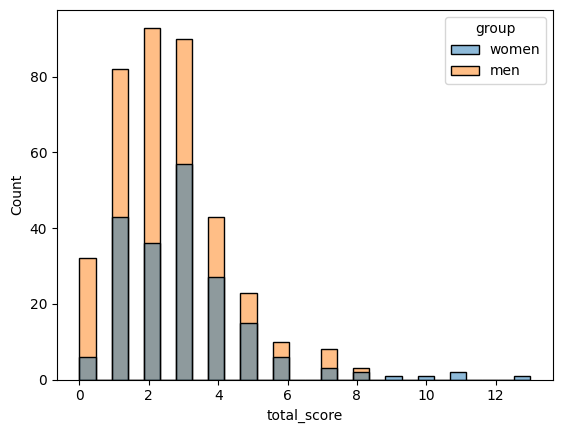

In [88]:
sns.histplot(data=df, x='total_score', hue='group')
plt.show()

Findings: The distribution is obviously not normally distributed because it seems not likely symmetric bell-shaped curve with a long right tail and many outliers.

To confirm the findings, the normality test will be performed:

In [89]:
pingouin.normality(data=df, dv='total_score', group='group', method='shapiro', alpha=0.05)

,W,pval,normal
group,,,
women,0.849101,3.890520e-13,False
men,0.926649,8.894154e-13,False


With p-value = 0, the null hypothesis is rejected. In the other words, the total score per match in the concatenated dataset is not normally distributed.

Conclusion: Mann-Whitney Test is appropriate.

2. Performing the Mann-Whitney test
2.1. Using pingouin

In [90]:
print(df.groupby('group')['total_score'].agg({'mean','count'}))

# Select the total scores of women's
women_sample = df[df['group']=='women']['total_score']
men_sample = df[df['group']=='men']['total_score']

# Run the test
mwu_test = pingouin.mwu(x = women_sample,
                        y = men_sample,
                       alternative='greater')
print(mwu_test)

# Extract the p-value
p_val = mwu_test['p-val'].values[0]

if p_val <= 0.1:
    result = 'reject'
else:
    result = 'fail to reject'

# Create the result in a dict
result_dict = {"p_val":p_val, "result":result}
print('\n', result_dict)

       count      mean
group                 
men      384  2.513021
women    200  2.980000
       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451

 {'p_val': 0.005106609825443641, 'result': 'reject'}
